In [1]:
# Importamos las librerías que vamos a necesitar

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import skew, kurtosis, norm
from scipy.linalg import sqrtm
import yfinance as yf
import cvxpy as cp
import riskfolio as rp
import scipy.stats as scs


# print(plt.style.available) #list of available styles
plt.style.use('ggplot')


In [9]:
#DEFINIMOS EL PERIODO DE TIEMPO QUE VAMOS A ANALIZAR Y LAS VARIABLES NECESARIAS PARA DESCARGAR LOS DATOS

FECHA_INICIO = '2014-02-27'
FECHA_FIN = '2024-02-27'
market_benchmark = '^RUT'
stocks_tickers = [
    'SMCI',  # SUPER MICRO COMPUTER, INC.
    'SSD',   # SIMPSON MANUFACTURING CO., INC.
    'JNPR',  # JUNIPER
    'CAC',   # E.L.F. BEAUTY, INC.
    'MSTR',  # MICROSTRATEGY INCORPORATED
    'UFPI',  # UFP INDUSTRIES, INC.
    'LNW',   # LIGHT & WONDER, INC.
    'T',  # ONTO INNOVATION INC.
    'RMBS',  # RAMBUS INC.
    'NVDA',  # BELLRING BRANDS, INC.
    'QLYS',  # QUALYS, INC.
    'FIX',   # COMFORT SYSTEMS USA, INC.
    'JNJ',   # API GROUP CORPORATION
    'SPSC',  # SPS COMMERCE, INC.
    'FN',    # FABRINET
    'CHRD',  # CHORD ENERGY CORPORATION
    'NFLX',  # WEATHERFORD INTERNATIONAL PLC
    'CVX',  # INTRA-CELLULAR THERAPIES, INC.
    'AIT',   # APPLIED INDUSTRIAL TECHNOLOGIES, INC.
    'TSLA',  # DUOLINGO, INC.
    'MTDR',  # MATADOR RESOURCES COMPANY
    'RHP',   # RYMAN HOSPITALITY PROPERTIES, INC.
    'SSB',   # SOUTHSTATE CORPORATION
    'MTH',   # MERITAGE HOMES CORPORATION
    'MUR',   # MURPHY OIL CORPORATION
    'ENSG',  # THE ENSIGN GROUP, INC.
    'CSCO',  # ATKORE INC.
    'NOVT',  # NOVANTA INC.
    'SIGI',  # SELECTIVE INSURANCE GROUP, INC.
    'CVLG'   # VAXCYTE, INC.
]



In [10]:
len(stocks_tickers)

30

In [13]:
prices_benchmark = yf.download(market_benchmark, start=FECHA_INICIO, end=FECHA_FIN)['Adj Close']
prices_stocks = yf.download(stocks_tickers, start=FECHA_INICIO, end=FECHA_FIN)['Adj Close']

c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\nacho\AppData\Local\Pr

In [14]:
# convertimos prices_benchmark en un dataframe
prices_benchmark = pd.DataFrame(prices_benchmark)


In [15]:
# change the second column name

prices_benchmark.columns = ['Benchmark']

In [16]:
prices_benchmark.head()

,Benchmark
Date,
2014-02-27,1187.939941
2014-02-28,1183.030029
2014-03-03,1176.359985
2014-03-04,1208.650024
2014-03-05,1205.910034


In [17]:
prices_stocks.head()

Ticker,AIT,CAC,CHRD,CSCO,CVLG,CVX,ENSG,FIX,FN,JNJ,...,RHP,RMBS,SIGI,SMCI,SPSC,SSB,SSD,T,TSLA,UFPI
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-27,42.481251,17.569855,29.378237,15.906627,9.494164,75.882080,9.594308,15.555615,18.969999,69.563171,...,28.916159,9.32,19.895519,20.780001,34.110001,50.451870,30.991888,11.314363,16.836000,16.518612
2014-02-28,42.481251,17.884291,30.040131,15.819539,9.728588,75.645973,9.594308,15.096202,19.420000,70.141830,...,28.977976,9.22,19.835266,20.190001,33.900002,49.705170,30.860937,11.209047,16.320667,16.647055
2014-03-03,42.081673,17.779470,30.722704,15.652642,9.875101,75.324593,9.640339,14.710301,19.540001,69.715462,...,28.923023,9.18,19.568378,20.280001,33.445000,48.990921,30.284756,11.184474,16.704000,16.545494
2014-03-04,42.964081,18.656059,31.363913,15.834058,10.109527,75.639412,10.057064,15.261591,20.490000,71.070763,...,29.369473,9.42,20.317364,20.730000,34.974998,50.143459,31.227602,11.286278,16.989332,17.071215
2014-03-05,42.914135,18.617949,30.446917,15.870340,10.588141,75.055664,10.180625,15.261591,20.350000,70.499710,...,29.582396,9.48,20.162401,21.070000,35.564999,49.640240,30.895866,11.279259,16.844000,17.080187


In [18]:
# Nos aseguramos de que no haya missing values
prices_stocks.columns[prices_stocks.isna().any()].tolist()
prices_benchmark.columns[prices_benchmark.isna().any()].tolist()


[]

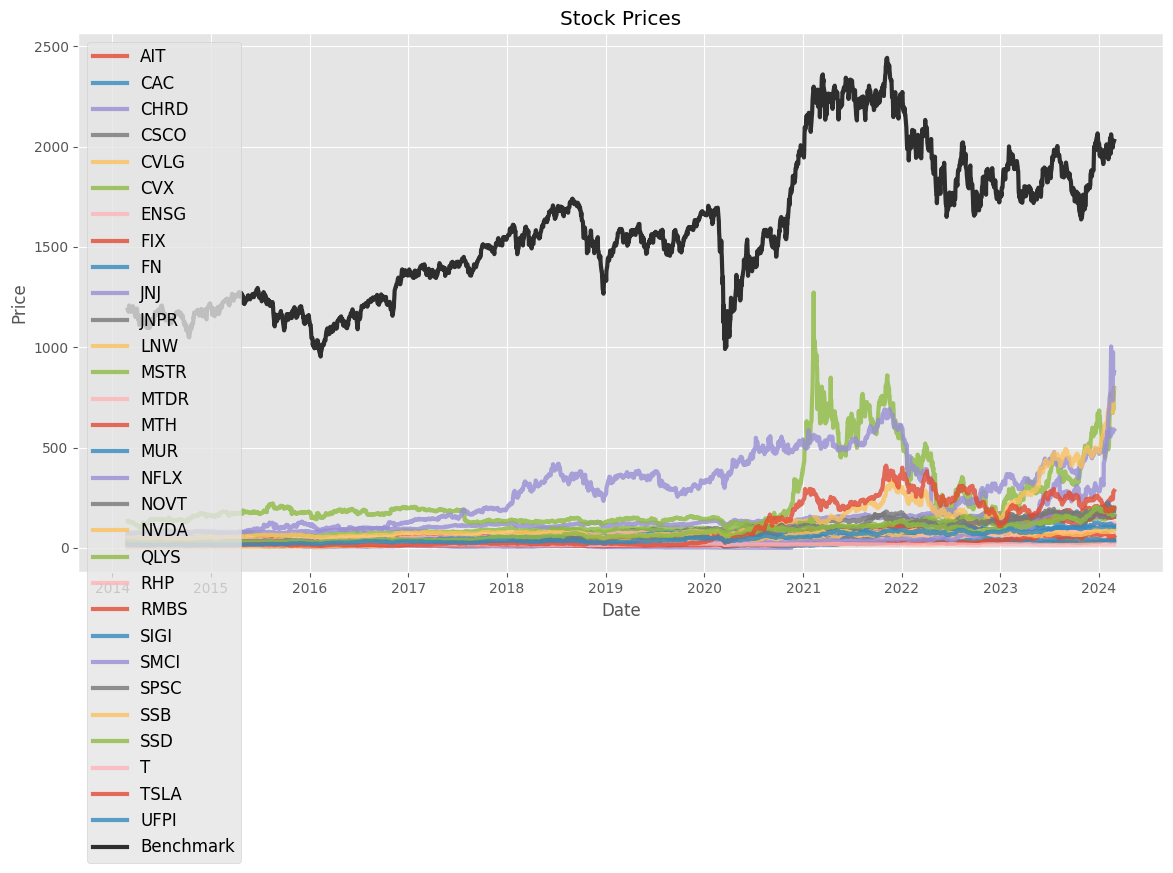

In [19]:
#plot prices_stocks and prices_benchmark in the same graph

plt.figure(figsize=(14, 7))
for c in prices_stocks.columns.values:
    plt.plot(prices_stocks.index, prices_stocks[c], lw=3, alpha=0.8, label=c)
plt.plot(prices_benchmark.index, prices_benchmark['Benchmark'], lw=3, alpha=0.8, label='Benchmark', color='black')
plt.title('Stock Prices')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left', fontsize=12)
plt.show()


In [20]:
retornos_benchmark = np.log(prices_benchmark).diff().dropna()
retornos_stocks = np.log(prices_stocks).diff().dropna()

In [21]:
retornos_benchmark.head()

,Benchmark
Date,
2014-02-28,-0.004142
2014-03-03,-0.005654
2014-03-04,0.027079
2014-03-05,-0.002270
2014-03-06,-0.001137


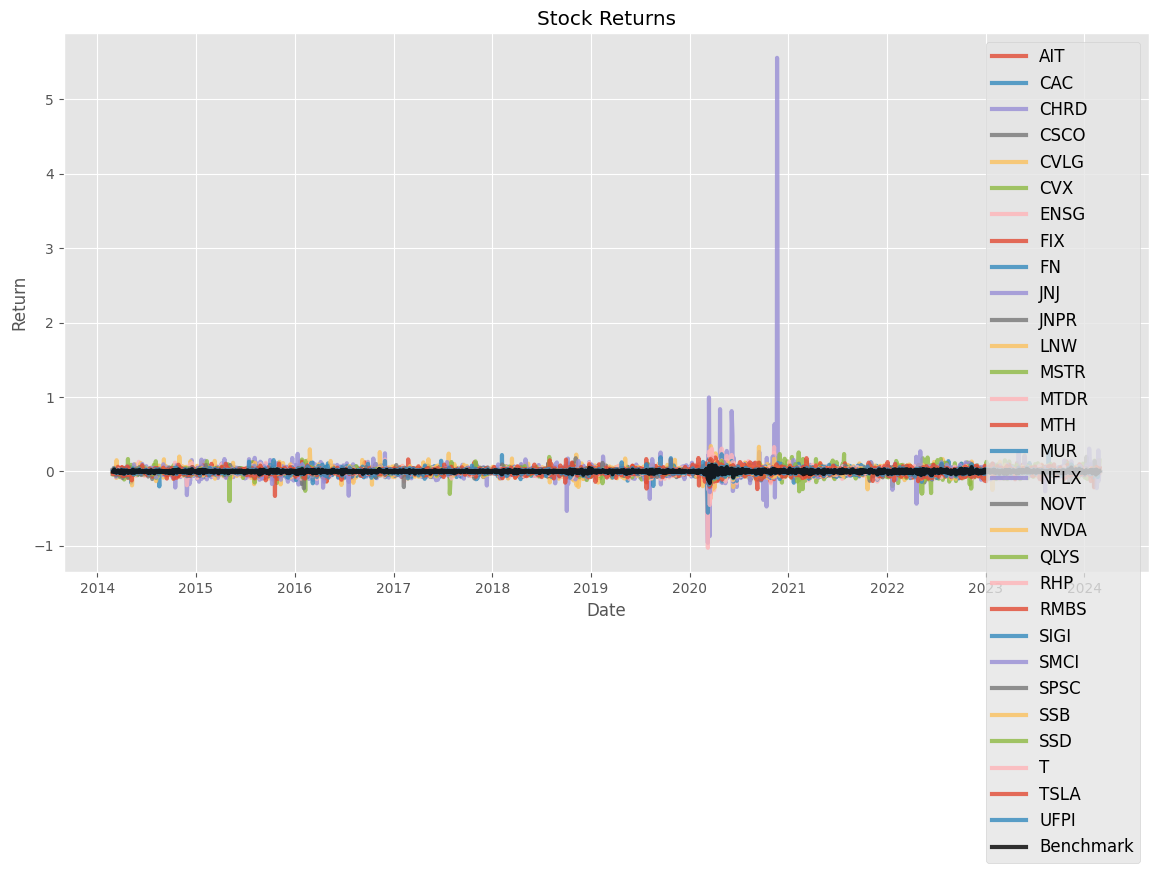

In [22]:
#plot retornos_stocks and retornos_benchmark in the same graph

plt.figure(figsize=(14, 7))
for c in retornos_stocks.columns.values:
    plt.plot(retornos_stocks.index, retornos_stocks[c], lw=3, alpha=0.8, label=c)
plt.plot(retornos_benchmark.index, retornos_benchmark['Benchmark'], lw=3, alpha=0.8, label='Benchmark', color='black')
plt.title('Stock Returns')
plt.ylabel('Return')
plt.xlabel('Date')
plt.legend(loc='upper right', fontsize=12)
plt.show()


c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Se

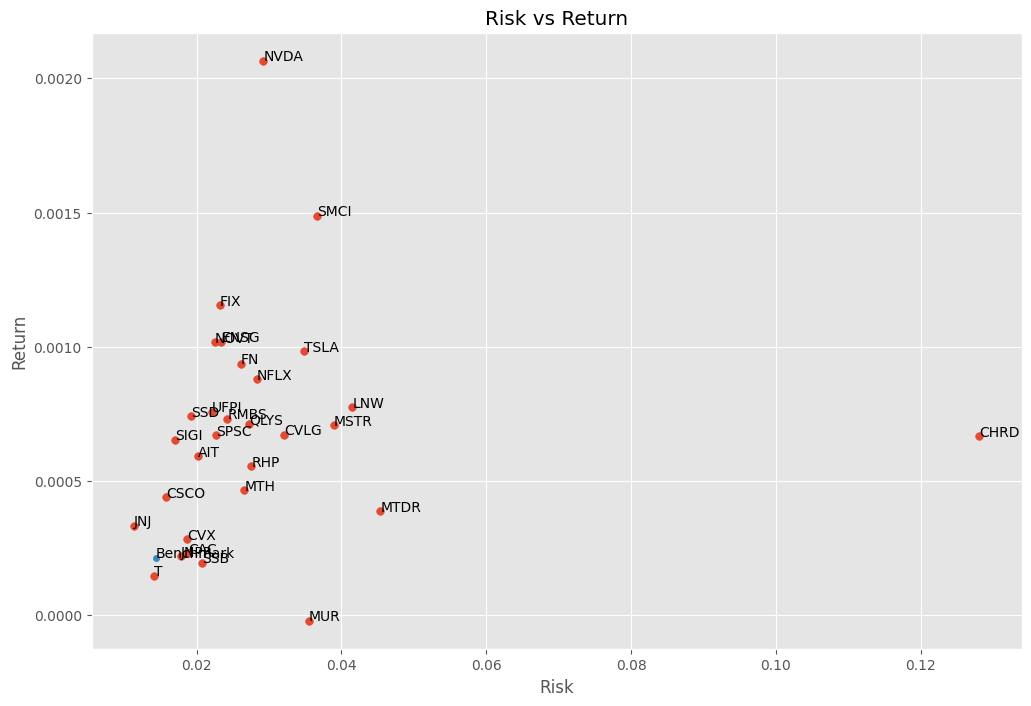

In [23]:
# hacer la gráfica de rentabilidad-riesgo de retornos_stocks

fig = plt.figure(figsize=(12, 8))
plt.scatter(retornos_stocks.std(), retornos_stocks.mean(), s=30)
plt.text(retornos_benchmark.std(), retornos_benchmark.mean(), 'Benchmark')
plt.scatter(retornos_benchmark.std(), retornos_benchmark.mean(), s = 20)

plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Risk vs Return')
plt.grid(True)
for i in retornos_stocks.columns:
    plt.text(retornos_stocks[i].std(), retornos_stocks[i].mean(), i)
plt.show()

# hacer la gráfica de rentabilidad-riesgo de retornos_stocks y añadir linea de regresion



In [ ]:
# #  xticklabels=retornos_stocks.columns, yticklabels=retornos_stocks.columns

# # Correlation matrix
# mat_corr = retornos_stocks.corr().to_numpy() 

# # Configurando el tamaño de la figura
# plt.figure(figsize=(8, 6))
# sns.heatmap(mat_corr, linewidths=.5, cmap="YlGnBu", xticklabels=retornos_stocks.columns, yticklabels=retornos_stocks.columns)
# # Añadiendo título
# plt.title("Mapa de Calor de la Correlación de Activos")

# # Mostrando la gráfica
# plt.show()

In [25]:
# plot skewness 
skewness = retornos_stocks.skew()
fig = go.Figure()
fig.add_trace(go.Bar(x=skewness.index, y=skewness.values))
fig.update_layout(title='Skewness of Stocks', xaxis_title='Stocks', yaxis_title='Skewness')
fig.show()


In [26]:
#CAPM
FECHA_INICIO_CAPM = '2014-02-28'


factors = pd.read_csv('F-F_Research_Data_Factors_daily.CSV', skiprows=3)
factors.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [27]:
factors.columns = ['date', 'mkt-rf', 'smb', 'hml', 'rf']
factors.head()

,date,mkt-rf,smb,hml,rf
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [28]:
factors['date'] = factors['date'].astype(str)
factors.head()

,date,mkt-rf,smb,hml,rf
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [29]:
factors['date'] = pd.to_datetime(factors['date'],format='%Y%m%d', errors='coerce').dt.strftime("%Y-%m-%d")
factors.head()

,date,mkt-rf,smb,hml,rf
0,1926-07-01,0.10,-0.25,-0.27,0.009
1,1926-07-02,0.45,-0.33,-0.06,0.009
2,1926-07-06,0.17,0.30,-0.39,0.009
3,1926-07-07,0.09,-0.58,0.02,0.009
4,1926-07-08,0.21,-0.38,0.19,0.009


In [30]:
factors = factors.set_index('date')
factors.head()

,mkt-rf,smb,hml,rf
date,,,,
1926-07-01,0.10,-0.25,-0.27,0.009
1926-07-02,0.45,-0.33,-0.06,0.009
1926-07-06,0.17,0.30,-0.39,0.009
1926-07-07,0.09,-0.58,0.02,0.009
1926-07-08,0.21,-0.38,0.19,0.009


In [31]:
factors = factors.loc[FECHA_INICIO_CAPM:FECHA_FIN]
factors.head()

,mkt-rf,smb,hml,rf
date,,,,
2014-02-28,0.15,-0.73,0.84,0.0
2014-03-03,-0.70,0.09,0.14,0.0
2014-03-04,1.67,1.10,-0.12,0.0
2014-03-05,0.01,-0.27,0.29,0.0
2014-03-06,0.16,-0.32,0.77,0.0


In [32]:
factors.index = pd.to_datetime(factors.index)
factors.head()

,mkt-rf,smb,hml,rf
date,,,,
2014-02-28,0.15,-0.73,0.84,0.0
2014-03-03,-0.70,0.09,0.14,0.0
2014-03-04,1.67,1.10,-0.12,0.0
2014-03-05,0.01,-0.27,0.29,0.0
2014-03-06,0.16,-0.32,0.77,0.0


In [33]:
factors.tail()

,mkt-rf,smb,hml,rf
date,,,,
2024-02-21,-0.03,-0.82,0.14,0.021
2024-02-22,2.01,-1.20,-1.30,0.021
2024-02-23,0.02,0.28,-0.03,0.021
2024-02-26,-0.26,1.00,-0.11,0.021
2024-02-27,0.27,1.19,-0.45,0.021


In [34]:
factors = factors.apply(pd.to_numeric, errors='coerce').div(100)
factors.head()

,mkt-rf,smb,hml,rf
date,,,,
2014-02-28,0.0015,-0.0073,0.0084,0.0
2014-03-03,-0.0070,0.0009,0.0014,0.0
2014-03-04,0.0167,0.0110,-0.0012,0.0
2014-03-05,0.0001,-0.0027,0.0029,0.0
2014-03-06,0.0016,-0.0032,0.0077,0.0


In [35]:
factors['mkt-rf'] = retornos_benchmark['Benchmark'] - factors['rf']
factors.head()

,mkt-rf,smb,hml,rf
date,,,,
2014-02-28,-0.004142,-0.0073,0.0084,0.0
2014-03-03,-0.005654,0.0009,0.0014,0.0
2014-03-04,0.027079,0.0110,-0.0012,0.0
2014-03-05,-0.002270,-0.0027,0.0029,0.0
2014-03-06,-0.001137,-0.0032,0.0077,0.0


In [ ]:
# factors = factors.dropna()

In [36]:
rf = factors['rf']
rf.head()

date
2014-02-28    0.0
2014-03-03    0.0
2014-03-04    0.0
2014-03-05    0.0
2014-03-06    0.0
Name: rf, dtype: float64

In [37]:
rf= rf.to_numpy().mean() 

rf

4.9256756756756764e-05

In [38]:
type(rf)

numpy.float64

In [39]:
type(retornos_stocks)

pandas.core.frame.DataFrame

In [40]:
len(retornos_stocks.columns)

30

In [41]:
def cartera_max_sharpe(retornos, rf):
    num_act = len(retornos.columns)
    retornos_esperados = retornos.mean().to_numpy()
    matriz_cov = retornos.cov().to_numpy()

    x = cp.Variable(num_act)
    pesos = x / cp.sum(x)

    pi = retornos_esperados - rf

    riesgo = cp.quad_form(x, matriz_cov)

    restricciones = [pi @ x == 1,
                    x >= 0]

    objetivo = cp.Minimize(riesgo)

    problema = cp.Problem(objetivo, restricciones)

    resultado = problema.solve('ECOS')

    pesos_sharpe = pesos.value
    pesos_sharpe[pesos_sharpe <= 1e-4] = 0
    
    return pesos_sharpe

In [42]:
pesos_sharpe = cartera_max_sharpe(retornos_stocks, rf)
pesos_sharpe

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17648821, 0.23259911, 0.        , 0.00460986,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.48374378, 0.        ,
       0.        , 0.        , 0.02133963, 0.08121924, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [43]:
pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos_sharpe])
activos_sharpe_filtrados = [asset for i, asset in enumerate(stocks_tickers) if pesos_ajustados[i] > 0]
pesos_sharpe_filtrados = [x for x in pesos_ajustados if x > 0]


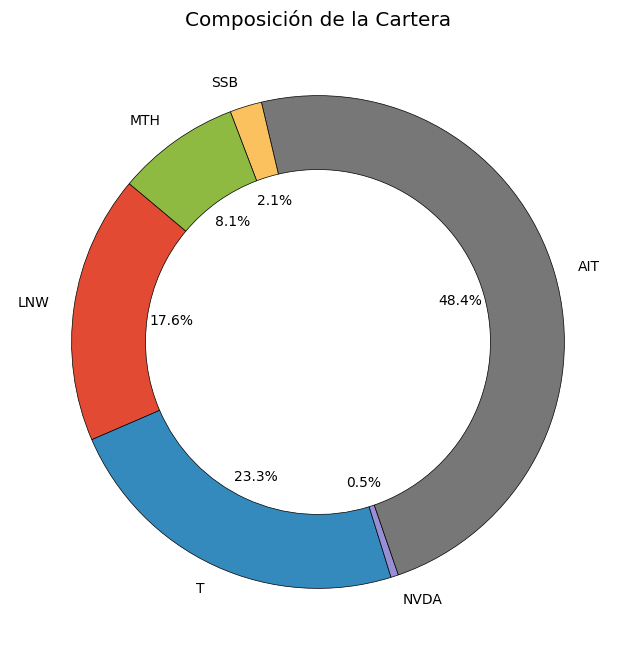

In [44]:
plt.figure(figsize=(8, 8))
plt.pie(pesos_sharpe_filtrados, labels=activos_sharpe_filtrados, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})
plt.title('Composición de la Cartera')
plt.show()

In [45]:
retornos_cartera_sharpe = (retornos_stocks @ pesos_sharpe)
rent_sharpe = retornos_cartera_sharpe.mean() 
vol_sharpe = retornos_cartera_sharpe.std() 
var_sharpe = retornos_cartera_sharpe.var() 

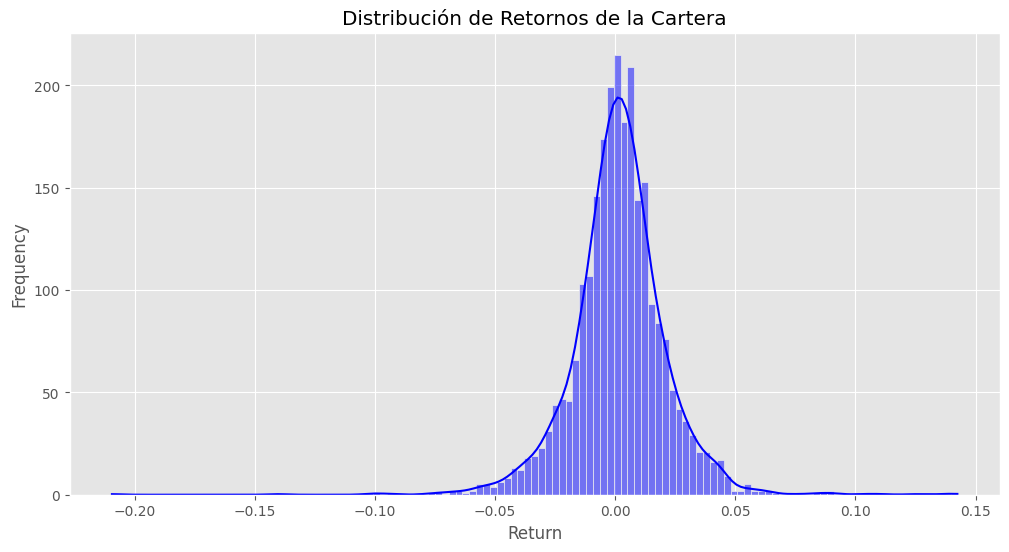

In [46]:
#plot the distribution of returns
plt.figure(figsize=(12, 6))
sns.histplot(retornos_cartera_sharpe, kde=True, color='blue')
plt.title('Distribución de Retornos de la Cartera')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Dibujamos el CAPM #
####################################


In [47]:
# Calcular la cartera de mínimo riesgo.
num_activos = len(retornos_stocks.columns)
retornos_esperados = retornos_stocks.mean().to_numpy()
matriz_cov = retornos_stocks.cov().to_numpy()

pesos = cp.Variable(num_activos)

restricciones = [cp.sum(pesos) == 1,
                 pesos >= 0]

rent = retornos_esperados @ pesos
riesgo = cp.quad_form(pesos, matriz_cov)

objetivo = cp.Minimize(riesgo)

problema = cp.Problem(objetivo, restricciones)

resultado = problema.solve("ECOS")

In [48]:
pesos_min_riesgo = pesos.value
pesos_min_riesgo[pesos_min_riesgo <= 1e-4] = 0

In [49]:
retornos_cartera = retornos_stocks@ pesos_min_riesgo
rent_min_riesgo = retornos_cartera.mean()
risk_min_riesgo = retornos_cartera.std()


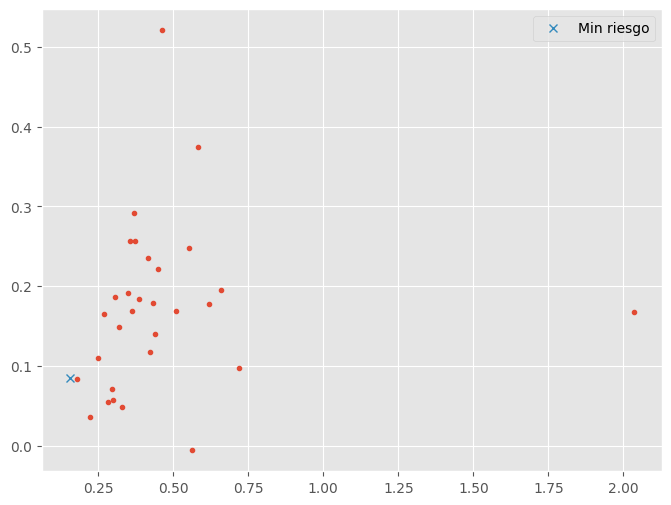

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(retornos_stocks.std()*np.sqrt(252), retornos_stocks.mean()*252, '.')
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', label="Min riesgo")
plt.legend()
plt.show()

In [51]:
# 3. Dibuja la frontera eficiente.
imax = np.argmax(retornos_stocks.mean())
max_riesgo = np.sqrt(matriz_cov[imax, imax])
riesgos = np.linspace(risk_min_riesgo, max_riesgo, 200)
rentabilidades = []
for risk in riesgos:
    pesos = cp.Variable(num_activos)

    rent = retornos_esperados @ pesos
    riesgo = cp.quad_form(pesos, matriz_cov)
    
    restricciones = [cp.sum(pesos) == 1,
                     pesos >= 0,
                     riesgo <= risk**2]

    objetivo = cp.Maximize(rent)

    problema = cp.Problem(objetivo, restricciones)

    resultado = problema.solve("ECOS")
    
    pesos = pesos.value
    retornos_cartera = retornos_stocks @ pesos
    rent = retornos_cartera.mean()
    rentabilidades.append(rent)
rentabilidades = np.array(rentabilidades)

c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.



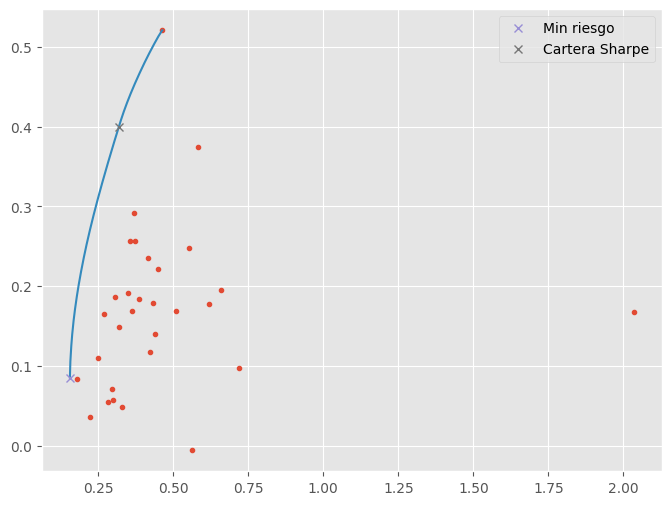

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(retornos_stocks.std()*np.sqrt(252), retornos_stocks.mean()*252, '.')
plt.plot(riesgos*np.sqrt(252), rentabilidades*252, '-')
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', label="Min riesgo")
plt.plot(vol_sharpe * np.sqrt(252), rent_sharpe * 252, 'x', label="Cartera Sharpe")
plt.legend()
plt.show()


In [53]:
# vamos a poner que la volatilidad objetivo sea 0.35 anual
#calculamos la cartera lineal con el activo libre de riesgo
# para fijar el riesgo objetivo.

rent_objetivo = 0.35 / 252
w = (rent_objetivo - rent_sharpe) / (rf - rent_sharpe)
risk_objetivo = (1 - w) * vol_sharpe

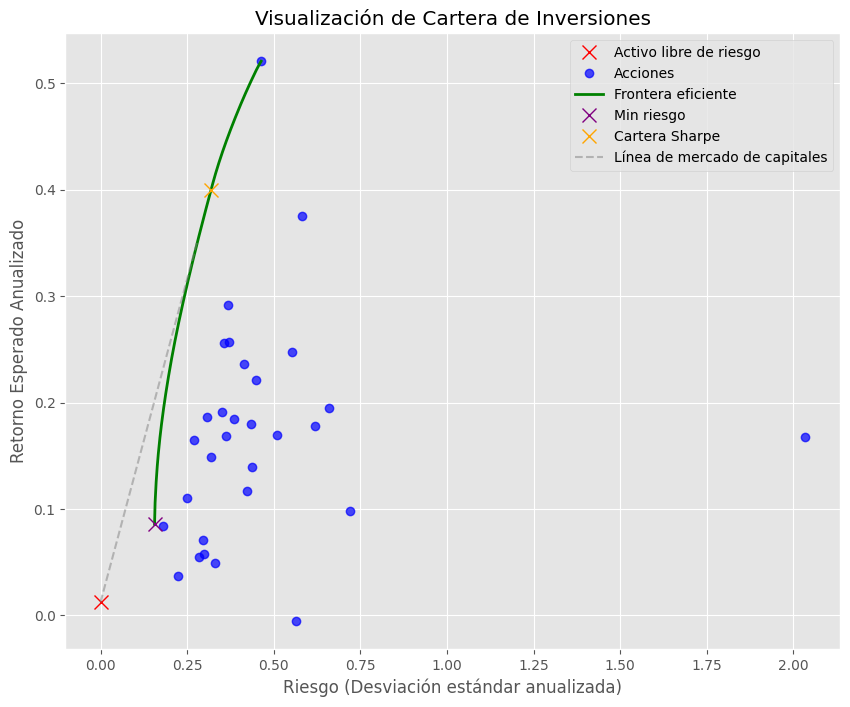

In [55]:
plt.style.use('ggplot')  # Estilo de gráfico
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
plt.plot(0, rf*252, 'x', label="Activo libre de riesgo", markersize=10, color='red')  # Marcador para el activo libre de riesgo
plt.plot(retornos_stocks.std()*np.sqrt(252), retornos_stocks.mean()*252, 'o', color='blue', alpha=0.7, label='Acciones')  # Puntos para las acciones
plt.plot(riesgos*np.sqrt(252), rentabilidades*252, '-', color='green', label='Frontera eficiente', linewidth=2)  # Línea para la frontera eficiente
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', markersize=10, color='purple', label="Min riesgo")  # Marcador para el mínimo riesgo
plt.plot(vol_sharpe * np.sqrt(252), rent_sharpe * 252, 'x', markersize=10, color='orange', label="Cartera Sharpe")  # Marcador para la cartera de máxima relación Sharpe
plt.plot([0, risk_objetivo*np.sqrt(252)], [rf*252, rent_objetivo*252], '--', color='grey', alpha=0.5, linewidth=1.5, label='Línea de mercado de capitales')  # Línea del mercado de capitales
plt.title('Visualización de Cartera de Inversiones')  # Título del gráfico
plt.xlabel('Riesgo (Desviación estándar anualizada)')  # Etiqueta del eje X
plt.ylabel('Retorno Esperado Anualizado')  # Etiqueta del eje Y
plt.legend()  # Leyenda
plt.show()  

In [56]:
# EL MISMO GRAFICO PERO INTERACTIVO

fig = go.Figure()

# Agregar el activo libre de riesgo
fig.add_trace(go.Scatter(x=[0], y=[rf*252], mode='markers', marker=dict(color='red', size=10), name='Activo libre de riesgo'))

# Agregar las acciones
fig.add_trace(go.Scatter(x=retornos_stocks.std()*np.sqrt(252), y=retornos_stocks.mean()*252, mode='markers', marker=dict(color='blue', opacity=0.7), name='Acciones'))

# Agregar la frontera eficiente
fig.add_trace(go.Scatter(x=riesgos*np.sqrt(252), y=rentabilidades*252, mode='lines', line=dict(color='green', width=2), name='Frontera eficiente'))

# Agregar el punto de mínimo riesgo
fig.add_trace(go.Scatter(x=[risk_min_riesgo*np.sqrt(252)], y=[rent_min_riesgo*252], mode='markers', marker=dict(color='purple', size=10), name='Min riesgo'))

# Agregar la cartera Sharpe
fig.add_trace(go.Scatter(x=[vol_sharpe*np.sqrt(252)], y=[rent_sharpe*252], mode='markers', marker=dict(color='orange', size=10), name='Cartera Sharpe'))

# Agregar la línea del mercado de capitales
fig.add_trace(go.Scatter(x=[0, risk_objetivo*np.sqrt(252)], y=[rf*252, rent_objetivo*252], mode='lines', line=dict(color='grey', width=2, dash='dash'), name='Línea de mercado de capitales'))

# Actualizar el diseño del gráfico
fig.update_layout(title='Visualización de Cartera de Inversiones',
                  xaxis_title='Riesgo (Desviación estándar anualizada)',
                  yaxis_title='Retorno Esperado Anualizado',
                  plot_bgcolor='white')

# Mostrar el gráfico
fig.show()

In [57]:
# Calculamos la cartera equiponderada
pesos_equi = np.ones(num_activos) / num_activos

retornos_cartera_equi = retornos_stocks @ pesos_equi
rent_equi = retornos_cartera_equi.mean()
vol_equi = retornos_cartera_equi.std()
var_equi = retornos_cartera_equi.var()

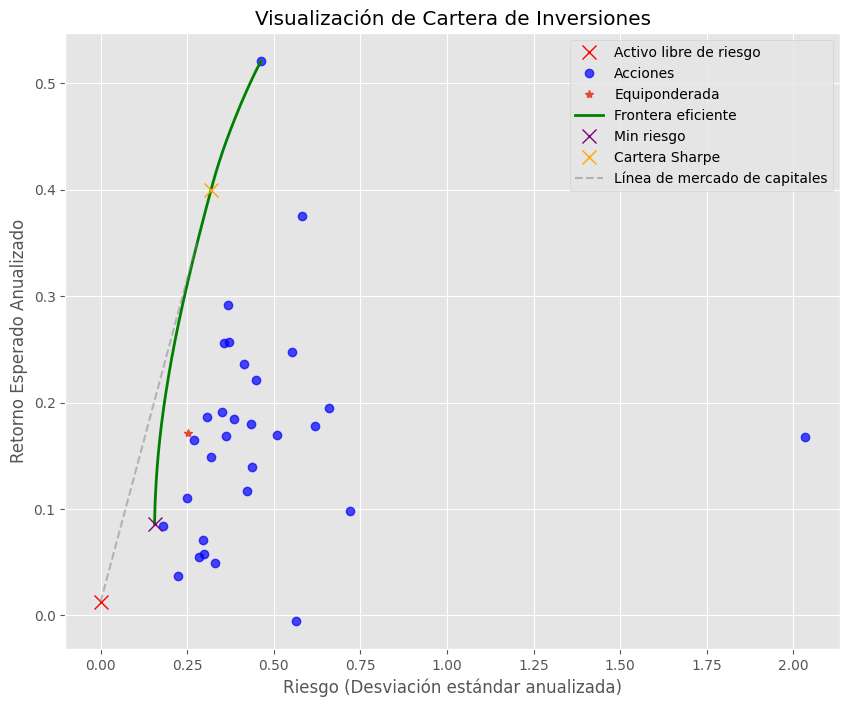

In [58]:
plt.style.use('ggplot')  # Estilo de gráfico
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
plt.plot(0, rf*252, 'x', label="Activo libre de riesgo", markersize=10, color='red')  # Marcador para el activo libre de riesgo
plt.plot(retornos_stocks.std()*np.sqrt(252), retornos_stocks.mean()*252, 'o', color='blue', alpha=0.7, label='Acciones')  # Puntos para las acciones
plt.plot(vol_equi*np.sqrt(252), rent_equi*252, '*', label="Equiponderada")
plt.plot(riesgos*np.sqrt(252), rentabilidades*252, '-', color='green', label='Frontera eficiente', linewidth=2)  # Línea para la frontera eficiente
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', markersize=10, color='purple', label="Min riesgo")  # Marcador para el mínimo riesgo
plt.plot(vol_sharpe * np.sqrt(252), rent_sharpe * 252, 'x', markersize=10, color='orange', label="Cartera Sharpe")  # Marcador para la cartera de máxima relación Sharpe
plt.plot([0, risk_objetivo*np.sqrt(252)], [rf*252, rent_objetivo*252], '--', color='grey', alpha=0.5, linewidth=1.5, label='Línea de mercado de capitales')  # Línea del mercado de capitales

plt.title('Visualización de Cartera de Inversiones')  # Título del gráfico
plt.xlabel('Riesgo (Desviación estándar anualizada)')  # Etiqueta del eje X
plt.ylabel('Retorno Esperado Anualizado')  # Etiqueta del eje Y
plt.legend()  # Leyenda
plt.show()  

In [59]:
# CARTERA DE MÁXIMO DRAWDOW

def calcular_drawdown(portfolio_returns):
    wealth_index = (1 + portfolio_returns).cumprod() #he quitado el 1000 de la ecuación, no cambia casi nada, se ponía para facilitar la interpretacion
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return drawdowns.min()

# Simular 10000 combinaciones aleatorias de pesos de cartera
n_simulaciones = 10000
n_activos = retornos_stocks.shape[1]
resultados = []

for _ in range(n_simulaciones):
    weights = np.random.random(n_activos)
    weights /= np.sum(weights)  # Asegurar que la suma de los pesos sea 1
    portfolio_returns = retornos_stocks.dot(weights)
    drawdown = calcular_drawdown(portfolio_returns)
    resultados.append((drawdown, weights))




In [60]:
min_drawdown, optimal_weights = min(resultados, key=lambda x: x[0])

print("Mínimo Drawdown:", min_drawdown)
print("Pesos óptimos:", optimal_weights)

Mínimo Drawdown: -0.7176866007142914
Pesos óptimos: [0.07441609 0.07026157 0.06407813 0.02065041 0.0310886  0.06264798
 0.00242981 0.05307762 0.000242   0.02703859 0.05457462 0.04381084
 0.0499425  0.07530059 0.03408475 0.07352264 0.00174637 0.01898696
 0.03241036 0.02209556 0.05575413 0.05265666 0.00016989 0.00659828
 0.00395167 0.02568316 0.0138292  0.00575299 0.00037695 0.02282108]


In [61]:
retornos_cartera_drawdown = retornos_stocks @ optimal_weights
rent_drawdown = retornos_cartera_drawdown.mean()
vol_drawdown = retornos_cartera_drawdown.std()
var_drawdown = retornos_cartera_drawdown.var()


In [62]:
# crear grafico donut

fig = go.Figure(data=[go.Pie(labels=stocks_tickers, values=optimal_weights, hole=.3)])
fig.show()



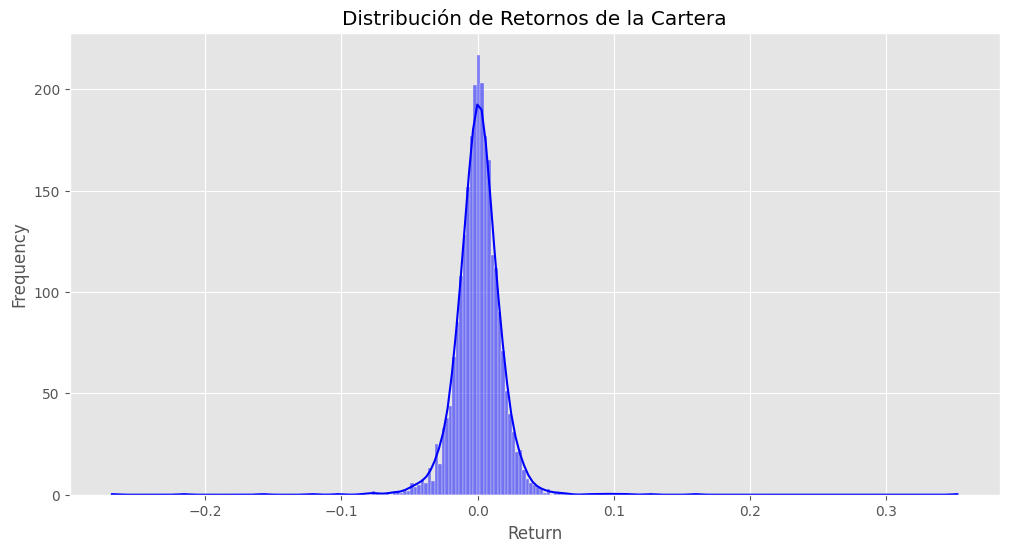

In [65]:
#plot the distribution of returns 
plt.figure(figsize=(12, 6))
sns.histplot(retornos_cartera_drawdown, kde=True, color='blue')
plt.title('Distribución de Retornos de la Cartera')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [66]:
fig = go.Figure(data=[go.Pie(labels=stocks_tickers, values=optimal_weights, hole=0.3)])

# Actualizar los textos de hover para mostrar más información
fig.update_traces(hoverinfo='label+percent+value', textinfo='none')

# Configuración del layout del gráfico
fig.update_layout(
    title='Distribución de Pesos Óptimos en la Cartera DRAWDOWN',
    annotations=[dict(text='Cartera', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Mostrar el gráfico
fig.show()

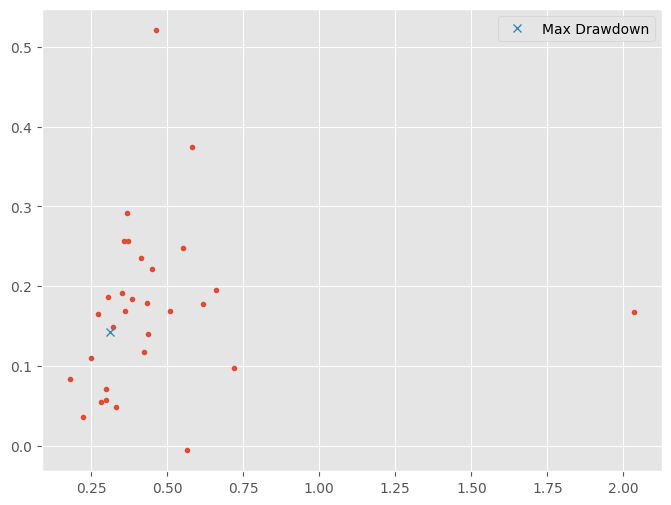

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(retornos_stocks.std()*np.sqrt(252), retornos_stocks.mean()*252, '.')
plt.plot(vol_drawdown*np.sqrt(252), rent_drawdown*252, 'x', label="Max Drawdown")
plt.legend()
plt.show()

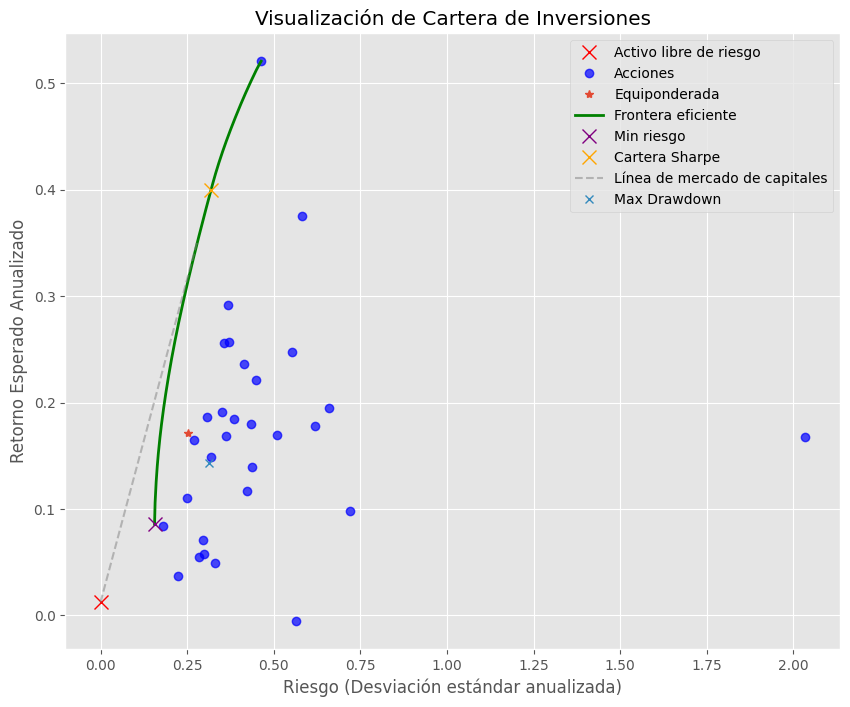

In [68]:
plt.style.use('ggplot')  # Estilo de gráfico
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
plt.plot(0, rf*252, 'x', label="Activo libre de riesgo", markersize=10, color='red')  # Marcador para el activo libre de riesgo
plt.plot(retornos_stocks.std()*np.sqrt(252), retornos_stocks.mean()*252, 'o', color='blue', alpha=0.7, label='Acciones')  # Puntos para las acciones
plt.plot(vol_equi*np.sqrt(252), rent_equi*252, '*', label="Equiponderada")
plt.plot(riesgos*np.sqrt(252), rentabilidades*252, '-', color='green', label='Frontera eficiente', linewidth=2)  # Línea para la frontera eficiente
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', markersize=10, color='purple', label="Min riesgo")  # Marcador para el mínimo riesgo
plt.plot(vol_sharpe * np.sqrt(252), rent_sharpe * 252, 'x', markersize=10, color='orange', label="Cartera Sharpe")  # Marcador para la cartera de máxima relación Sharpe
plt.plot([0, risk_objetivo*np.sqrt(252)], [rf*252, rent_objetivo*252], '--', color='grey', alpha=0.5, linewidth=1.5, label='Línea de mercado de capitales')  # Línea del mercado de capitales
plt.plot(vol_drawdown*np.sqrt(252), rent_drawdown*252, 'x', label="Max Drawdown")

plt.title('Visualización de Cartera de Inversiones')  # Título del gráfico
plt.xlabel('Riesgo (Desviación estándar anualizada)')  # Etiqueta del eje X
plt.ylabel('Retorno Esperado Anualizado')  # Etiqueta del eje Y
plt.legend()  # Leyenda
plt.show()  

In [69]:
# CALCULAR LA CARTERA DE MINIMO CVAR AL 95%
retornos_stocks_np = retornos_stocks.to_numpy()
retornos_esperados_stocks_np = retornos_stocks.mean().to_numpy()

In [70]:
# Calculamos los datos necesarios para la optimización

alpha = 0.05    # Nivel de confianza

num_data, num_act = retornos_stocks.shape # Número de datos y número de activos


In [71]:
# Variables de la optimización

pesos = cp.Variable(num_act)
t = cp.Variable()  #VaR
ui = cp.Variable(num_data) #Exceso de pérdida con respecto al VaR

riesgo = t + cp.sum(ui)/(alpha * num_data)  #CVaR
retornos = retornos_esperados.T @ pesos

restricciones = [
    -retornos_stocks_np @ pesos - t - ui <= 0,  # Las pérdidas son menores que VaR más el exceso de pérdida
    ui >= 0,  # Los excesos son positivos
    cp.sum(pesos) == 1,
    pesos >= 0,  # No se pueden tener posiciones cortas
]

In [72]:
objective = cp.Minimize(riesgo)

# Solve the problem
prob = cp.Problem(objective, restricciones)
cvar95_min_cvar = prob.solve(solver='ECOS')

In [73]:
pesos_ajustados_cvar = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value])

activos_filtrados_cvar = [asset for i, asset in enumerate(stocks_tickers) if pesos_ajustados_cvar[i] > 0] # Activos con pesos mayores a 10**-4
pesos_filtrados_cvar = [x for x in pesos_ajustados_cvar if x > 0] # Pesos mayores a 10**-4

activos_filtrados_cvar = [asset for i, asset in enumerate(stocks_tickers) if pesos_ajustados_cvar[i] > 0] # Activos con pesos mayores a 10**-4
pesos_filtrados_cvar = [x for x in pesos_ajustados_cvar if x > 0] # Pesos mayores a 10**-4


In [74]:
retornos_cartera_cvar = retornos_stocks @ pesos_ajustados_cvar
rent_cvar = retornos_cartera_cvar.mean()
vol_cvar = retornos_cartera_cvar.std()
var_cvar = retornos_cartera_cvar.var()

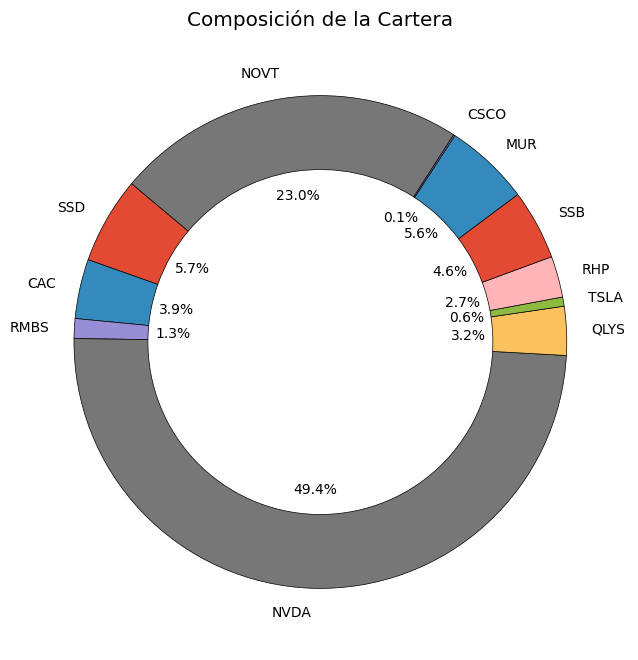

In [75]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados_cvar, labels=activos_filtrados_cvar, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera')

# Mostrar el gráfico
plt.show()

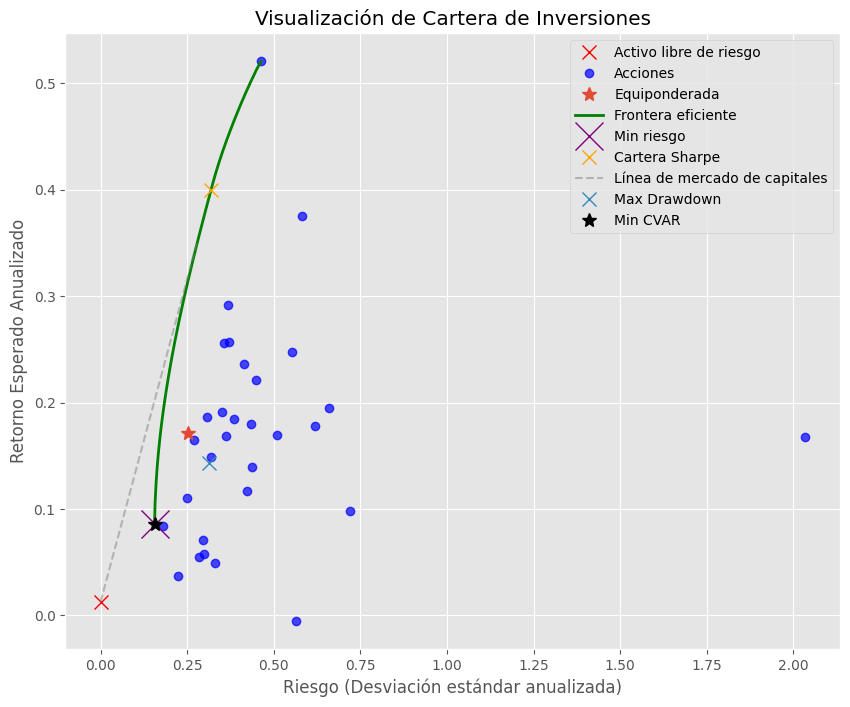

In [76]:
plt.style.use('ggplot')  # Estilo de gráfico
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
plt.plot(0, rf*252, 'x', label="Activo libre de riesgo", markersize=10, color='red')  # Marcador para el activo libre de riesgo
plt.plot(retornos_stocks.std()*np.sqrt(252), retornos_stocks.mean()*252, 'o', color='blue', alpha=0.7, label='Acciones')  # Puntos para las acciones
plt.plot(vol_equi*np.sqrt(252), rent_equi*252, '*', label="Equiponderada", markersize=10)
plt.plot(riesgos*np.sqrt(252), rentabilidades*252, '-', color='green', label='Frontera eficiente', linewidth=2)  # Línea para la frontera eficiente
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', markersize=20, color='purple', label="Min riesgo")  # Marcador para el mínimo riesgo
plt.plot(vol_sharpe * np.sqrt(252), rent_sharpe * 252, 'x', markersize=10, color='orange', label="Cartera Sharpe")  # Marcador para la cartera de máxima relación Sharpe
plt.plot([0, risk_objetivo*np.sqrt(252)], [rf*252, rent_objetivo*252], '--', color='grey', alpha=0.5, linewidth=1.5, label='Línea de mercado de capitales')  # Línea del mercado de capitales
plt.plot(vol_drawdown*np.sqrt(252), rent_drawdown*252, 'x', label="Max Drawdown", markersize=10)
plt.plot(vol_cvar*np.sqrt(252), rent_cvar*252, '*', label="Min CVAR", markersize=10, color='black')

plt.title('Visualización de Cartera de Inversiones')  # Título del gráfico
plt.xlabel('Riesgo (Desviación estándar anualizada)')  # Etiqueta del eje X
plt.ylabel('Retorno Esperado Anualizado')  # Etiqueta del eje Y
plt.legend()  # Leyenda
plt.show()  

In [ ]:
# print(f'el retorno de la cartera de minimo CVAR al 95% es de {rent_cvar*252} y la volatilidad es de {vol_cvar*252}')
# print(f'el retorno de la cartera de minimo riesgo es de {rent_min_riesgo*252} y la volatilidad es de {risk_min_riesgo*252} ')

In [77]:

fig = go.Figure()

# Agregar el activo libre de riesgo
fig.add_trace(go.Scatter(x=[0], y=[rf*252], mode='markers', marker=dict(color='red', size=10), name='Activo libre de riesgo'))

# Agregar las acciones con etiquetas de tickers
fig.add_trace(go.Scatter(x=retornos_stocks.std()*np.sqrt(252), y=retornos_stocks.mean()*252, mode='markers', marker=dict(color='blue', size=10), text=stocks_tickers, hoverinfo='text+x+y', name='Acciones'))

# Continuar agregando los demás componentes del gráfico
fig.add_trace(go.Scatter(x=[vol_equi*np.sqrt(252)], y=[rent_equi*252], mode='markers', marker=dict(color='magenta', size=10), name='Equiponderada'))
fig.add_trace(go.Scatter(x=riesgos*np.sqrt(252), y=rentabilidades*252, mode='lines', line=dict(color='green', width=2), name='Frontera eficiente'))
fig.add_trace(go.Scatter(x=[vol_sharpe*np.sqrt(252)], y=[rent_sharpe*252], mode='markers', marker=dict(color='orange', size=10), name='Cartera Sharpe'))
fig.add_trace(go.Scatter(x=[0, risk_objetivo*np.sqrt(252)], y=[rf*252, rent_objetivo*252], mode='lines', line=dict(dash='dash', color='grey', width=2), name='Línea de mercado de capitales'))
fig.add_trace(go.Scatter(x=[vol_drawdown*np.sqrt(252)], y=[rent_drawdown*252], mode='markers', marker=dict(color='cyan', size=10), name='Max Drawdown'))
fig.add_trace(go.Scatter(x=[vol_cvar*np.sqrt(252)], y=[rent_cvar*252], mode='markers', marker=dict(color='black', size=10), name='Min CVAR'))

# Configuración del layout del gráfico
fig.update_layout(title='Visualización de Cartera de Inversiones',
                  xaxis_title='Riesgo (Desviación estándar anualizada)',
                  yaxis_title='Retorno Esperado Anualizado',
                  plot_bgcolor='white')

# Mostrar el gráfico
fig.show()


In [81]:
#Calculamos la cartera de Risk Parity

def cartera_risk_parity (ret):
    
    ''' 
    Función que calcula la cartera de riesgo paridad para un DataFrame de rendimientos
    ret: DataFrame de rendimientos
    Retorna pesos_ajustados: Array con los pesos de la cartera de riesgo paridad'''
    
    if isinstance(ret, pd.DataFrame):
        
        num_act = ret.shape[1]
        matriz_cov = ret.cov().to_numpy()
        retornos_esperados = ret.mean().to_numpy()
        
        b = 1/num_act

        x = cp.Variable(num_act)
        gamma = cp.Variable(num_act, nonneg=True)
        psi = cp.Variable(nonneg=True)

        z = matriz_cov @ x

        obj = cp.pnorm(b**0.5 * psi - gamma, p=2)
        ret = retornos_esperados.T @ x

        constraints = [cp.sum(x) == 1,
                    x >= 0,
                    cp.SOC(psi, sqrtm(matriz_cov) @ x)]

        for i in range(num_act):
            constraints += [cp.SOC(x[i] + z[i],
                                cp.vstack([2*gamma[i], x[i] - z[i]]))
                            ]

        objective = cp.Minimize(obj * 1000)
        prob = cp.Problem(objective, constraints)
        prob.solve(solver='ECOS')

        pesos_ajustados = np.array([np.round(xi, 3) if xi > 10**-4 else 0 for xi in x.value])

        return pesos_ajustados 
    
    
    else:
        raise ValueError('La función cartera_risk_parity solo acepta un DataFrame como argumento')
    

In [82]:
pesos_risk_parity = cartera_risk_parity(retornos_stocks)

In [83]:
pesos_risk_parity

array([0.032, 0.038, 0.011, 0.044, 0.03 , 0.037, 0.033, 0.031, 0.032,
       0.085, 0.044, 0.019, 0.025, 0.017, 0.027, 0.022, 0.036, 0.031,
       0.026, 0.035, 0.025, 0.032, 0.042, 0.026, 0.034, 0.033, 0.035,
       0.064, 0.026, 0.03 ])

In [84]:
pesos_ajustados_risk_parity = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos_risk_parity])

activos_filtrados_risk_parity = [asset for i, asset in enumerate(stocks_tickers) if pesos_ajustados_risk_parity[i] > 0] # Activos con pesos mayores a 10**-4
pesos_filtrados_risk_parity = [x for x in pesos_ajustados_risk_parity if x > 0] # Pesos mayores a 10**-4

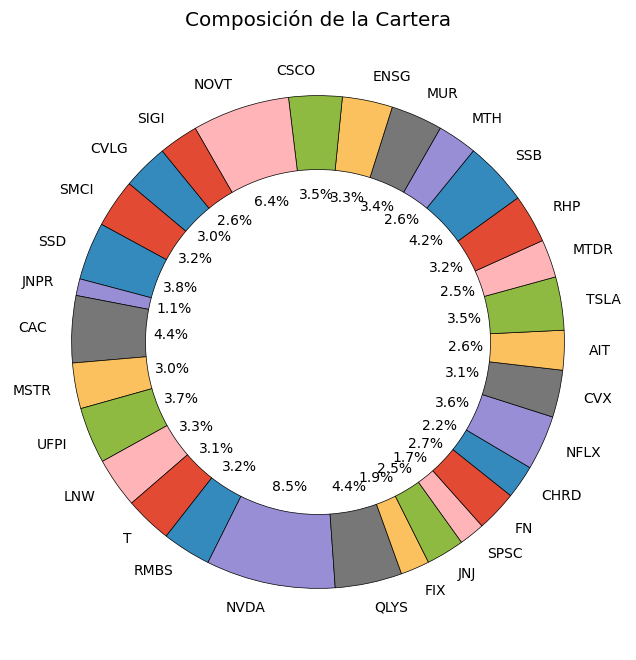

In [85]:
# Pie chart

plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados_risk_parity, labels=activos_filtrados_risk_parity, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título

plt.title('Composición de la Cartera')

# Mostrar el gráfico

plt.show()

In [86]:
retornos_cartera_risk_parity = (retornos_stocks @ pesos_risk_parity)
rent_risk_parity = retornos_cartera_risk_parity.mean()
vol_risk_parity = retornos_cartera_risk_parity.std()
var_risk_parity = retornos_cartera_risk_parity.var()

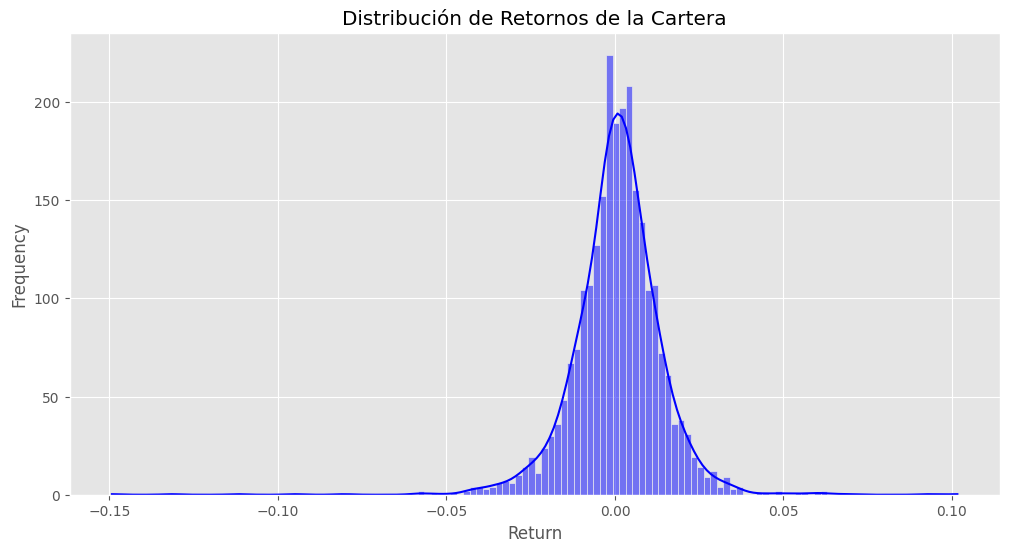

In [88]:
#plot the distribution of returns
plt.figure(figsize=(12, 6))
sns.histplot(retornos_cartera_risk_parity, kde=True, color='blue')
plt.title('Distribución de Retornos de la Cartera')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

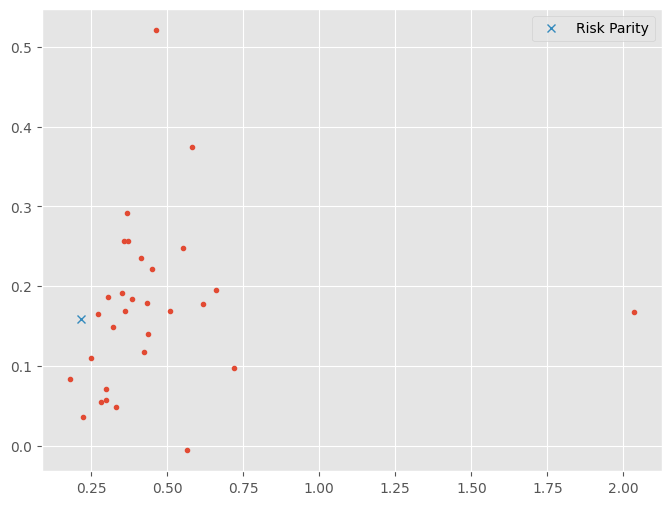

In [89]:
plt.figure(figsize=(8, 6))
plt.plot(retornos_stocks.std()*np.sqrt(252), retornos_stocks.mean()*252, '.')
plt.plot(vol_risk_parity*np.sqrt(252), rent_risk_parity*252, 'x', label="Risk Parity")
plt.legend()
plt.show()

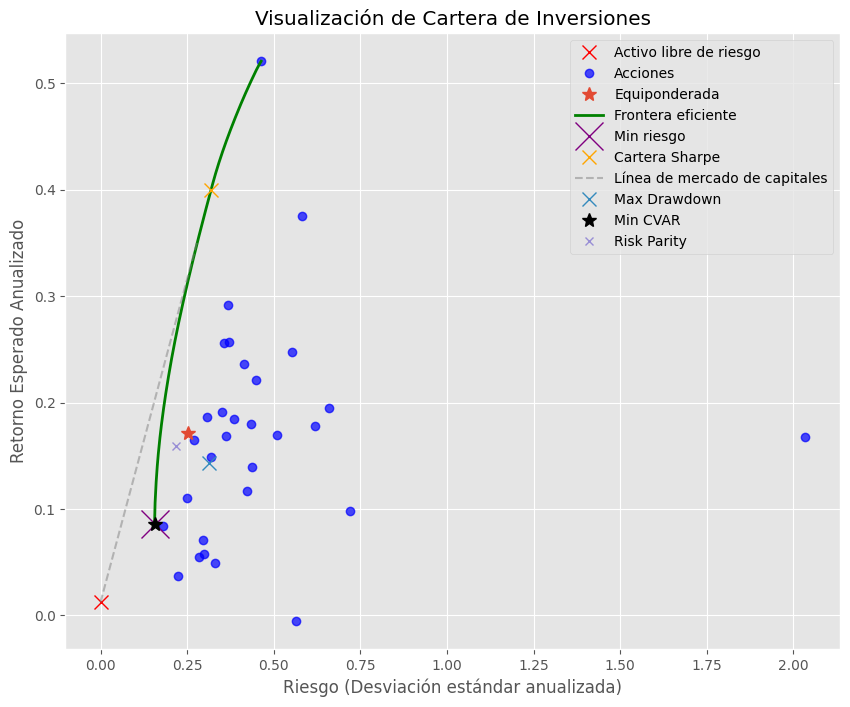

In [90]:
plt.style.use('ggplot')  # Estilo de gráfico
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
plt.plot(0, rf*252, 'x', label="Activo libre de riesgo", markersize=10, color='red')  # Marcador para el activo libre de riesgo
plt.plot(retornos_stocks.std()*np.sqrt(252), retornos_stocks.mean()*252, 'o', color='blue', alpha=0.7, label='Acciones')  # Puntos para las acciones
plt.plot(vol_equi*np.sqrt(252), rent_equi*252, '*', label="Equiponderada", markersize=10)
plt.plot(riesgos*np.sqrt(252), rentabilidades*252, '-', color='green', label='Frontera eficiente', linewidth=2)  # Línea para la frontera eficiente
plt.plot(risk_min_riesgo*np.sqrt(252), rent_min_riesgo*252, 'x', markersize=20, color='purple', label="Min riesgo")  # Marcador para el mínimo riesgo
plt.plot(vol_sharpe * np.sqrt(252), rent_sharpe * 252, 'x', markersize=10, color='orange', label="Cartera Sharpe")  # Marcador para la cartera de máxima relación Sharpe
plt.plot([0, risk_objetivo*np.sqrt(252)], [rf*252, rent_objetivo*252], '--', color='grey', alpha=0.5, linewidth=1.5, label='Línea de mercado de capitales')  # Línea del mercado de capitales
plt.plot(vol_drawdown*np.sqrt(252), rent_drawdown*252, 'x', label="Max Drawdown", markersize=10)
plt.plot(vol_cvar*np.sqrt(252), rent_cvar*252, '*', label="Min CVAR", markersize=10, color='black')
plt.plot(vol_risk_parity*np.sqrt(252), rent_risk_parity*252, 'x', label="Risk Parity")

plt.title('Visualización de Cartera de Inversiones')  # Título del gráfico
plt.xlabel('Riesgo (Desviación estándar anualizada)')  # Etiqueta del eje X
plt.ylabel('Retorno Esperado Anualizado')  # Etiqueta del eje Y
plt.legend()  # Leyenda
plt.show()  